In [5]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

In [6]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[3]
Data_base_learning_v2 = main_path+open_folder[4]
path2 = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\"
open_folder1= os.listdir(path2)
Data_train = path2+open_folder1[10]
Data_test = path2+open_folder1[9]
print(open_folder1)
print(Data_test)

['.DS_Store', '.ipynb_checkpoints', '2014', '2015', '2016', '2017', '2018', 'All_years', 'Data_API.ipynb', 'Data_Test_Foot.csv', 'Data_Train_Foot.csv', 'Points_Equipe_Hist', 'Points_Equipe_Hist_VF', 'Recup_Data_Historical.ipynb', 'Teams_puiss.csv', 'Web_Score.ipynb']
C:\Users\Amrta\Documents\GitHub\projetannuel4IABD2\ETAPE_3\Scripts_Recup_Data\Projet_Annuel_Data\Data_Test_Foot.csv


Machine Amrta

In [7]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [8]:
# filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
# filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv

In [9]:
# Chargement des données csv
data= pd.read_csv(filename,sep=";",index_col=0)
data
# y prend le score à prédire
y=data.mi_temps_gagnante
data.head()

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


In [10]:
np.unique(y)

array([0, 1, 2], dtype=int64)

In [11]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1424,2020-07-01,FINISHED,279508,ACF Fiorentina,US Sassuolo Calcio,99,471,2679,3086,1.214286,1.714286,1.392857,1.750000
1085,2020-07-01,FINISHED,273889,Real Betis Balompié,Villarreal CF,90,94,8949,5396,1.343750,1.593750,1.625000,1.250000
1423,2020-07-01,FINISHED,279512,Bologna FC 1909,Cagliari Calcio,103,104,3818,2866,1.428571,1.678571,1.607143,1.571429
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,1.607143,1.071429,1.035714,1.250000
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0.857143,0.821429,1.571429,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,2.000000,1.566667,1.166667,1.000000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.966667,1.633333,1.200000,1.066667
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [12]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9238, 6) (9238,)
3


array([2, 2, 1, ..., 0, 2, 0])

In [13]:
def create_model():
    
    model = Sequential()
    model.add(Dense(3, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(1024, input_dim=x_train.shape[1], activation='relu')) 
    model.add(Dense(524, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(1024, input_dim=x_train.shape[1], activation='relu'))   
    model.add(BatchNormalization())
    model.add(Dropout(0.05))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [14]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 21        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              132096    
_________________________________________________________________
dense_3 (Dense)              (None, 524)               537100    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               67200     
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              132096    
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4

In [15]:
save = ModelCheckpoint('model_Foot_mi_temps.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [ ]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=200,
                    callbacks = [save])

Train on 9238 samples, validate on 2310 samples
Epoch 1/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0988 - accuracy: 0.4297
Epoch 00001: val_accuracy improved from -inf to 0.39957, saving model to model_Foot_mi_temps.h5
9238/9238 [==============================] - 8s 861us/sample - loss: 1.0995 - accuracy: 0.4286 - val_loss: 1.1657 - val_accuracy: 0.3996
Epoch 2/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0959 - accuracy: 0.4362
Epoch 00002: val_accuracy improved from 0.39957 to 0.44502, saving model to model_Foot_mi_temps.h5
9238/9238 [==============================] - 3s 279us/sample - loss: 1.0976 - accuracy: 0.4353 - val_loss: 1.0701 - val_accuracy: 0.4450
Epoch 3/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0954 - accuracy: 0.4347
Epoch 00003: val_accuracy improved from 0.44502 to 0.44675, saving model to model_Foot_mi_temps.h5
9238/9238 [==============================] - 3s 283us/sample - loss: 1.0955 - accuracy:

8910/9238 [===========================>..] - ETA: 0s - loss: 1.0897 - accuracy: 0.4336
Epoch 00028: val_accuracy did not improve from 0.44719
9238/9238 [==============================] - 2s 246us/sample - loss: 1.0914 - accuracy: 0.4317 - val_loss: 1.1392 - val_accuracy: 0.4156
Epoch 29/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0866 - accuracy: 0.4395 ETA: 0s - loss: 1.0855 - accu
Epoch 00029: val_accuracy did not improve from 0.44719
9238/9238 [==============================] - 2s 245us/sample - loss: 1.0867 - accuracy: 0.4396 - val_loss: 1.1494 - val_accuracy: 0.4186
Epoch 30/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0786 - accuracy: 0.44 - ETA: 0s - loss: 1.0788 - accuracy: 0.4427
Epoch 00030: val_accuracy did not improve from 0.44719
9238/9238 [==============================] - 2s 262us/sample - loss: 1.0783 - accuracy: 0.4427 - val_loss: 1.0848 - val_accuracy: 0.4143
Epoch 31/200
9180/9238 [============================>.] - ETA: 0s

Epoch 95/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0744 - accuracy: 0.4405
Epoch 00095: val_accuracy did not improve from 0.44719
9238/9238 [==============================] - 3s 306us/sample - loss: 1.0737 - accuracy: 0.4411 - val_loss: 1.0844 - val_accuracy: 0.4459
Epoch 96/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0679 - accuracy: 0.4462
Epoch 00096: val_accuracy did not improve from 0.44719
9238/9238 [==============================] - 3s 328us/sample - loss: 1.0685 - accuracy: 0.4459 - val_loss: 1.0997 - val_accuracy: 0.4199
Epoch 97/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0673 - accuracy: 0.4473
Epoch 00097: val_accuracy did not improve from 0.44719
9238/9238 [==============================] - 3s 277us/sample - loss: 1.0672 - accuracy: 0.4472 - val_loss: 1.0719 - val_accuracy: 0.4459
Epoch 98/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0708 - accuracy: 0.4409
Epoch 00098: val_accurac

Epoch 123/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0674 - accuracy: 0.4459
Epoch 00123: val_accuracy did not improve from 0.44719
9238/9238 [==============================] - 3s 290us/sample - loss: 1.0679 - accuracy: 0.4448 - val_loss: 1.0670 - val_accuracy: 0.4394
Epoch 124/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0724 - accuracy: 0.4453
Epoch 00124: val_accuracy did not improve from 0.44719
9238/9238 [==============================] - 2s 240us/sample - loss: 1.0722 - accuracy: 0.4445 - val_loss: 1.0666 - val_accuracy: 0.4459
Epoch 125/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0702 - accuracy: 0.4437
Epoch 00125: val_accuracy did not improve from 0.44719
9238/9238 [==============================] - 2s 240us/sample - loss: 1.0695 - accuracy: 0.4443 - val_loss: 1.0632 - val_accuracy: 0.4459
Epoch 126/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0649 - accuracy: 0.4486
Epoch 00126: val_acc

Epoch 151/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.0662 - accuracy: 0.4446
Epoch 00151: val_accuracy did not improve from 0.44719
9238/9238 [==============================] - 3s 289us/sample - loss: 1.0659 - accuracy: 0.4450 - val_loss: 1.0696 - val_accuracy: 0.4394
Epoch 152/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0675 - accuracy: 0.4466
Epoch 00152: val_accuracy did not improve from 0.44719
9238/9238 [==============================] - 2s 269us/sample - loss: 1.0676 - accuracy: 0.4462 - val_loss: 1.0666 - val_accuracy: 0.4437
Epoch 153/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.0644 - accuracy: 0.4475
Epoch 00153: val_accuracy did not improve from 0.44719
9238/9238 [==============================] - 2s 261us/sample - loss: 1.0649 - accuracy: 0.4471 - val_loss: 1.0650 - val_accuracy: 0.4459
Epoch 154/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0642 - accuracy: 0.4468
Epoch 00154: val_acc

Text(0, 0.5, 'Accuracy')

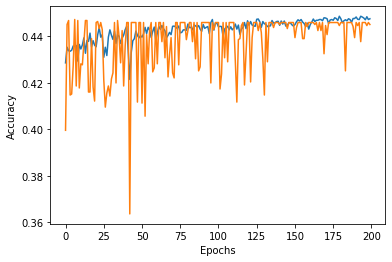

In [17]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction

In [18]:
unique = x_prediction.values
results = []

i = 0
unique[1]
np.unique(y_train)
predictions_final = model.predict(np.array([x_train[59]]))
predictions_final.shape


(1, 3)

In [19]:
model.load_weights("model_Foot_mi_temps.h5")

In [20]:
results = []
zero =[]
un = []
deux = []
for i in unique:
    predictions_final = model.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    pred0 =round(predictions_final[0][0],2)
    zero.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    un.append(pred1)
    pred2 =round(predictions_final[0][2],2)
    deux.append(pred2)
    results.append(result)
    print(result,predictions_final)

2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.23142014 0.33132726 0.43725255]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.0963231  0.4375176  0.46615922]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.19978064 0.36179978 0.43841952]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2243619  0.33786255 0.43777555]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.20625207 0.3553092  0.43843874]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907

2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.20703332 0.33312556 0.45984116]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907 0.43335885]]
2 [[0.2627521  0.30388907

In [83]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'mi_temps_gagnante':results}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
1424,2020-07-01,279508,FINISHED,99,471,ACF Fiorentina,US Sassuolo Calcio,2
1085,2020-07-01,273889,FINISHED,90,94,Real Betis Balompié,Villarreal CF,2
1423,2020-07-01,279512,FINISHED,103,104,Bologna FC 1909,Cagliari Calcio,2
1983,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,2
1982,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,2
...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,2
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,2
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,2
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,2


In [84]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante.json')

In [85]:
finished = []
scheduled = []

In [86]:
for i in df.values:
    if i[2] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [87]:
column_names = ["date","id_match", "status","id_HomeTeam","id_AwayTeam","homeTeam","AwayTeam","mi_temps_gagnante"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)

In [88]:
df_fini

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
0,2020-07-01,279508,FINISHED,99,471,ACF Fiorentina,US Sassuolo Calcio,2
1,2020-07-01,273889,FINISHED,90,94,Real Betis Balompié,Villarreal CF,2
2,2020-07-01,279512,FINISHED,103,104,Bologna FC 1909,Cagliari Calcio,2
3,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,2
4,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,2
...,...,...,...,...,...,...,...,...
82,2020-07-09,279534,FINISHED,450,108,Hellas Verona FC,FC Internazionale Milano,2
83,2020-07-09,273907,FINISHED,89,88,RCD Mallorca,Levante UD,2
84,2020-07-09,273913,FINISHED,278,745,SD Eibar,CD Leganés,2
85,2020-07-09,264674,FINISHED,62,340,Everton FC,Southampton FC,2


In [89]:
df_programme

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
0,2020-07-11,264686,SCHEDULED,68,563,Norwich City FC,West Ham United FC,2
1,2020-07-11,264689,SCHEDULED,346,67,Watford FC,Newcastle United FC,2
2,2020-07-11,264683,SCHEDULED,64,328,Liverpool FC,Burnley FC,2
3,2020-07-11,264687,SCHEDULED,356,61,Sheffield United FC,Chelsea FC,2
4,2020-07-11,264688,SCHEDULED,397,65,Brighton & Hove Albion FC,Manchester City FC,2
...,...,...,...,...,...,...,...,...
172,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,2
173,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,2
174,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,2
175,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,2


In [90]:
df_fini.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_finished.csv',index=False)
df_fini.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_finished.json')

In [91]:
df_programme.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_scheduled.csv',index=False)
df_programme.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_scheduled.json')